## Group 3 - Project 2
# Online Shopper Purchase Prediction

In [24]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

import model as Group3Models

In [25]:
#Read in CSV
online_shopping_df = pd.read_csv('online_shoppers_intention.csv')

online_shopping_df.info()

online_shopping_df["Revenue"].value_counts()

# online_shopping_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Visualize PCA

In [26]:
pca_model = PCA(n_components=2)

<Axes: xlabel='OperatingSystems', ylabel='Count'>

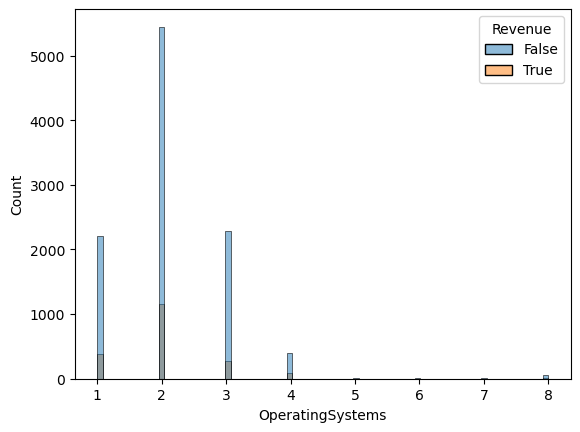

In [27]:
#EDA
sns.histplot(data=online_shopping_df, x='OperatingSystems', hue='Revenue')

<Axes: xlabel='ExitRates', ylabel='Count'>

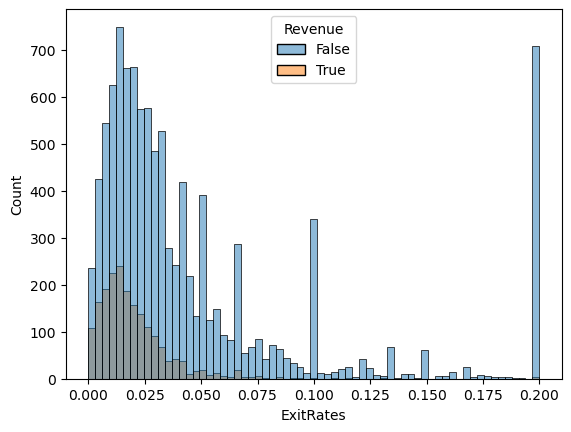

In [28]:
sns.histplot(data=online_shopping_df, x='ExitRates', hue='Revenue')

In [29]:
#Drop the target column, setup X and y datasets for train test split
X = online_shopping_df.drop('Revenue', axis=1)
y = online_shopping_df['Revenue']

X.head()

#Train Test Split
X_test, X_train, y_test, y_train = train_test_split(X, y)
X_train.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000
mean,2.337982,79.843208,0.498865,32.137220,30.638015,1170.514461,0.022935,0.044284,5.620942,0.062212,2.109633,2.354849,3.188128,4.031463
std,3.346515,171.994088,1.272780,128.647177,42.269300,1783.303438,0.049910,0.049548,17.467705,0.197870,0.898290,1.729407,2.397468,4.023453
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,164.166667,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.000000,0.000000,0.000000,17.000000,579.333333,0.002989,0.026449,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.212500,0.000000,0.000000,36.000000,1458.246667,0.017098,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,24.000000,2657.318056,14.000000,2256.916667,486.000000,29970.465970,0.200000,0.200000,255.569158,1.000000,8.000000,13.000000,9.000000,20.000000


## Add Encodings to Feature Columns

In [30]:
#Encode VisitorType Column
ordinal_encoder = OrdinalEncoder()
X_train['VisitorType'] = ordinal_encoder.fit_transform(X_train[['VisitorType']])

#Ordinal Encode the Month Column
ordinal_encoder = OrdinalEncoder(categories=[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']])
X_train['Month'] = ordinal_encoder.fit_transform(X_train[['Month']])
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
2050,0,0.000000,0,0.0,3,903.000000,0.000000,0.066667,0.000000,0.0,2.0,2,2,1,1,2.0,False
7796,8,157.316667,0,0.0,48,691.950000,0.012667,0.021381,6.887181,0.0,9.0,2,2,1,1,2.0,False
8733,3,99.750000,0,0.0,31,835.583333,0.000000,0.006452,47.448508,0.0,10.0,2,2,1,10,2.0,False
895,0,0.000000,0,0.0,12,402.166667,0.041667,0.065000,0.000000,0.0,2.0,3,2,2,1,2.0,False
5906,1,5.500000,3,169.2,14,517.660000,0.011111,0.022222,50.183139,0.0,6.0,3,2,1,2,2.0,True


<Axes: >

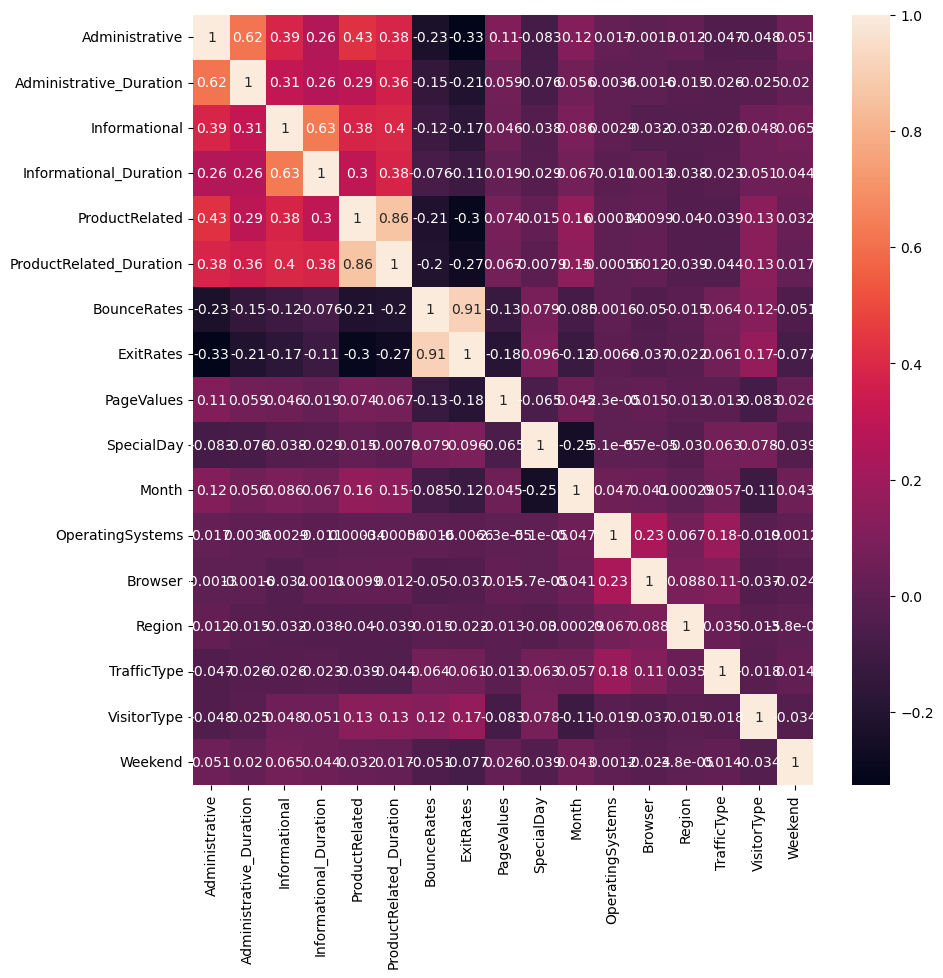

In [31]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=X_train.corr(), annot=True)

## Create a Model and predict

In [ ]:
#Create a Random Forest Classifier
model = Group3Models.don_model()
model.fit(X_train, y_train)
# model.score(X_test, y_test)
# y_pred = model.predict(X_test)

ValueError: could not convert string to float: 'Aug'

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.96      0.94      7826
        True       0.73      0.53      0.61      1421

    accuracy                           0.90      9247
   macro avg       0.82      0.75      0.78      9247
weighted avg       0.89      0.90      0.89      9247

